# K Means Clustering Project


K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
- Reassign data points to the cluster whose centroid is closest. 
- Calculate new centroid of each cluster. 

These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Create some Data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# Create Data
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)
data


(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

We can see our data is actually a tuple. Lets grab the first element.

In [4]:
data[0].shape

(200, 2)

We have 2 features here as specified above.

## 2. Visualize Data

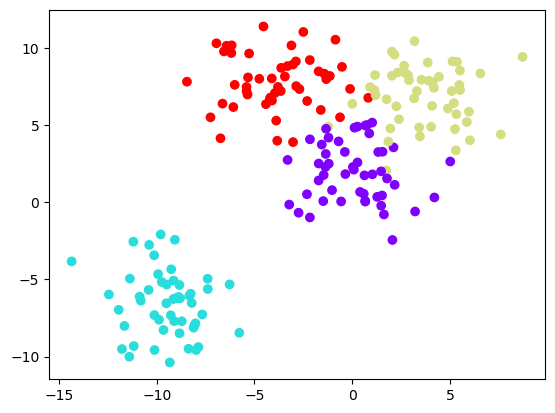

In [34]:
# Plotting the first column against the second column 
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

## 3. Creating the Clusters

In [35]:
from sklearn.cluster import KMeans

In [36]:
kmeans = KMeans(n_clusters=4)

In [37]:
kmeans.fit(data[0])

KMeans(n_clusters=4)

In [38]:
kmeans.cluster_centers_

array([[-0.0123077 ,  2.13407664],
       [-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735],
       [-4.13591321,  7.95389851]])

In [39]:
kmeans.labels_

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 0, 1, 3, 3, 3,
       0, 2, 3, 0, 1, 0, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       0, 1, 1, 1, 1, 0, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       2, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 2, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

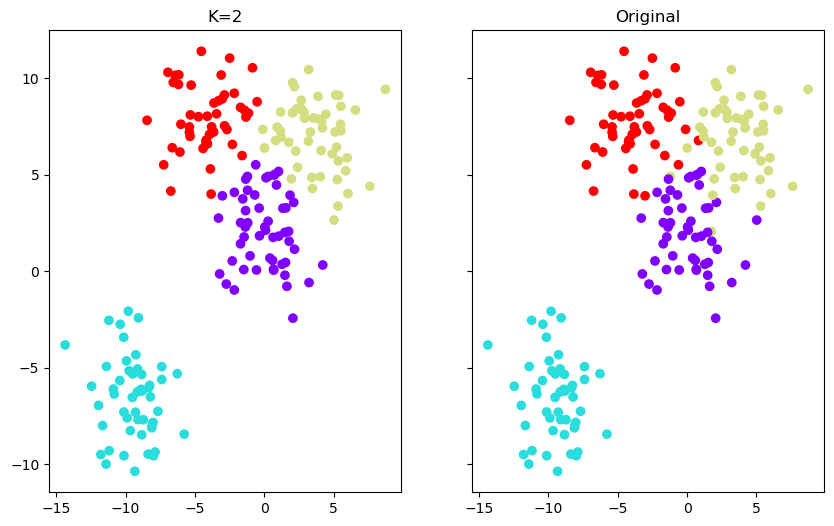

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K=2')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

We can see how our model compared with the original 

## 3. Evaluating the model

Lets print out our confusion matrix and classification report to see how accurate our model is if we compare the cluster data

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data[1],kmeans.labels_))
print(classification_report(data[1],kmeans.labels_))

[[49  0  1  0]
 [ 0 50  0  0]
 [ 3  0 47  0]
 [ 2  0  2 46]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        50
           1       1.00      1.00      1.00        50
           2       0.94      0.94      0.94        50
           3       1.00      0.92      0.96        50

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



Our model is **96**% accurate!

## 4. Improving the model 

Lets use the elbow method to try and determine the best K value

In [42]:
sse = []
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km.fit(data[0])
    sse.append(km.inertia_)

C:\Users\pate8284\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


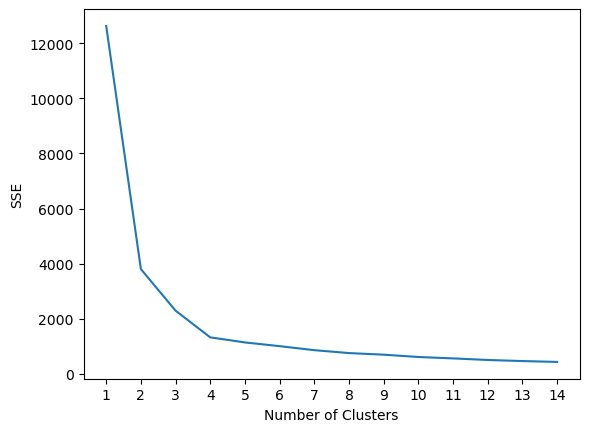

In [43]:
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


We can see here that after 4 clusters the difference in error becomes minimal. Lets choose K=7.

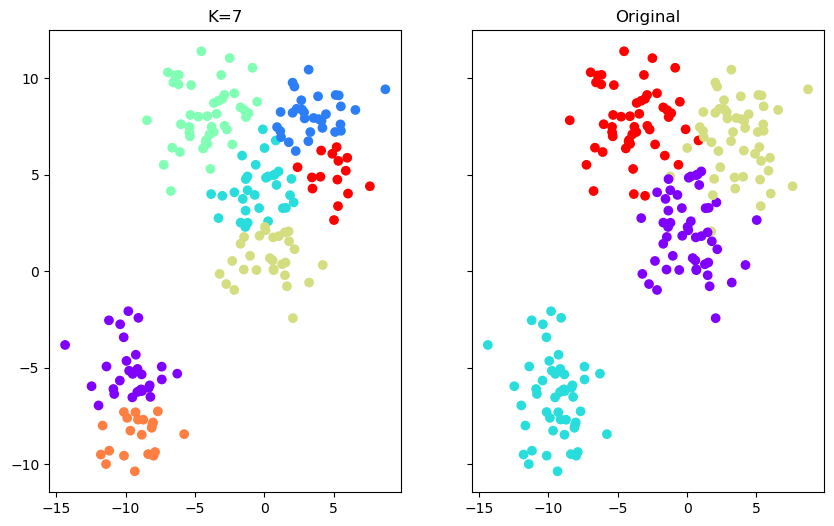

In [44]:
km = KMeans(n_clusters=7)
km.fit(data[0])
km.labels_

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K=7')
ax1.scatter(data[0][:,0],data[0][:,1],c=km.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

It doesn't look very accurate as it seems to have overfitted.

Lets print out the confusion matrix again and classification report. 

In [45]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data[1],km.labels_))
print(classification_report(data[1],km.labels_))

[[ 0  0 21  0 28  0  1]
 [29  0  0  0  0 21  0]
 [ 0 31  4  0  1  0 14]
 [ 0  0  6 44  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.13      0.08      0.10        50
           3       1.00      0.88      0.94        50
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.24       200
   macro avg       0.16      0.14      0.15       200
weighted avg       0.28      0.24      0.26       200



C:\Users\pate8284\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pate8284\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pate8284\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model is now only **24**% accurate which is worse! We have overfitted the data.